In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("3) test_scores.csv")
df

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [7]:
scaler = MinMaxScaler()
scaler.fit(df[['math']])
df['math'] = scaler.transform(df[['math']])
scaler = MinMaxScaler()
scaler.fit(df[['cs']])
df['cs'] = scaler.transform(df[['cs']])
df

,name,math,cs
0,david,1.000000,1.000000
1,laura,0.368421,0.558824
2,sanjay,0.929825,0.750000
3,wei,0.614035,0.735294
4,jeff,0.789474,0.779412
5,aamir,0.245614,0.323529
6,venkat,0.526316,0.529412
7,virat,0.000000,0.000000
8,arthur,0.543860,0.558824
9,paul,0.561404,0.632353


In [8]:
SSE = []
k_rng = range(1,len(df[['math']]))
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['math','cs']])
    SSE.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

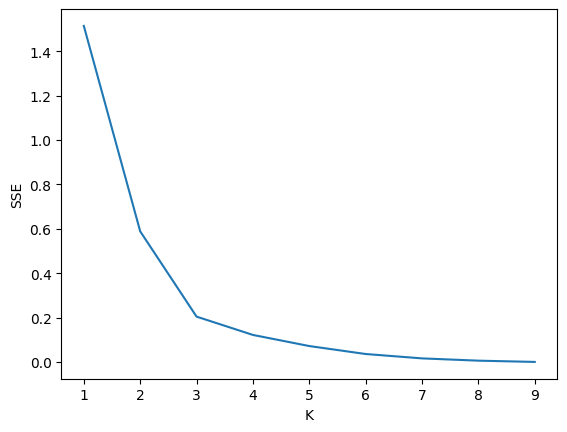

In [9]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,SSE)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


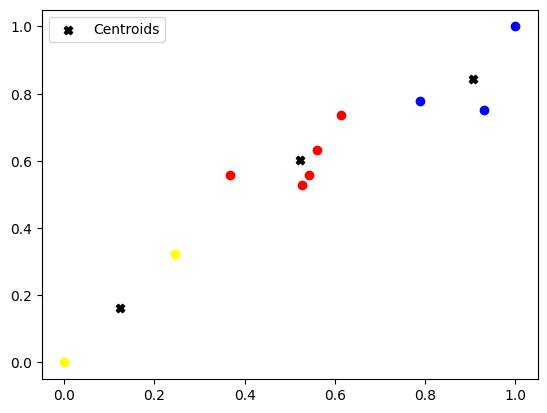

In [11]:
km = KMeans(n_clusters=3)
df['cluster'] = km.fit_predict(df[['math','cs']])
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['math'],df1['cs'],color='yellow')
plt.scatter(df2['math'],df2['cs'],color='red')
plt.scatter(df3['math'],df3['cs'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black', marker='X',label='Centroids')
plt.legend()
plt.show()